# SED example
In this notebook, we show an example of a SED from one of the chapters of the thesis. I focus on the composition of the SED rather than the models applied to create the SED. First, we import the Python packages.

In [1]:
import warnings
from astropy.table import Table
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib
import numpy as np


warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)

## Standard Plot Format
Setup the standard plotting format and make the plot.

In [2]:
# graphic aspect ratio = width/height
ASPECT = 16.0/9.0

# Text width in inches - don't change, this is defined by the print layout
TEXTWIDTH = 5.14  # inches

# output format and resolution
FIG_FMT = 'pdf'
DPI = 300

# Graphic dimensions
PLT_W = DPI*TEXTWIDTH
PLT_H = PLT_W/ASPECT
AX_FONTSIZE = 10
LAB_FONTSIZE = 8
LWIDTH = 0.5
AX_PAD = 3
WINCHES = TEXTWIDTH
HINCHES = WINCHES/ASPECT

# LaTeX is used throughout for markup of symbols, Times-Roman serif font
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif',
       'serif': ['Times-Roman'], 'weight': 'bold', 'size': '16'})

# Font and line weight defaults for axes
matplotlib.rc('axes', linewidth=LWIDTH)
matplotlib.rcParams.update({'font.size': AX_FONTSIZE})

# axis and label padding
plt.rcParams['xtick.major.pad'] = f'{AX_PAD}'
plt.rcParams['ytick.major.pad'] = f'{AX_PAD}'
plt.rcParams['axes.labelpad'] = f'{AX_PAD}'

## Get data
We retrive the data from Github to create this plot

In [3]:
GITHUB_LINK = 'https://raw.githubusercontent.com/aframosp/AGNView/main/'
phot = Table.read(GITHUB_LINK+'Data/Final/CIGPhot_EnergyBal_All.tbl', format='ascii')
ModelS = Table.read(GITHUB_LINK+'Data/Final/CIGALEOutputs/Cleanresults_SK.fits', format='fits')

We define the wavelengths of the bands used for the plot.

In [6]:
wavelengths = {"FUV": 0.152, "NUV": 0.227, "u_prime": 0.354, "g_prime": 0.477,
               "r_prime": 0.623, "i_prime": 0.762, "z_prime": 0.913, "J_2mass": 1.25,
               "H_2mass": 1.65, "Ks_2mass": 2.17, "WISE1": 3.4, "IRAC1": 3.6, "IRAC2": 4.5,
               "WISE2": 4.6, "IRAC3": 5.8, "IRAC4": 8.0, "IRAS1": 12.0, "WISE3": 12.0,
               "WISE4": 22.0, "MIPS1": 24.0, "IRAS2": 25.0, "IRAS3": 60.0, "PACS_blue": 70.0,
               "MIPS2": 70.0, "PACS_green": 100.0, "IRAS4": 100.0, "PACS_red": 160.0,
               "MIPS3": 160.0, "PSW_ext": 250.0, "PMW_ext": 350.0, "PLW_ext": 500.0}

##### Figure

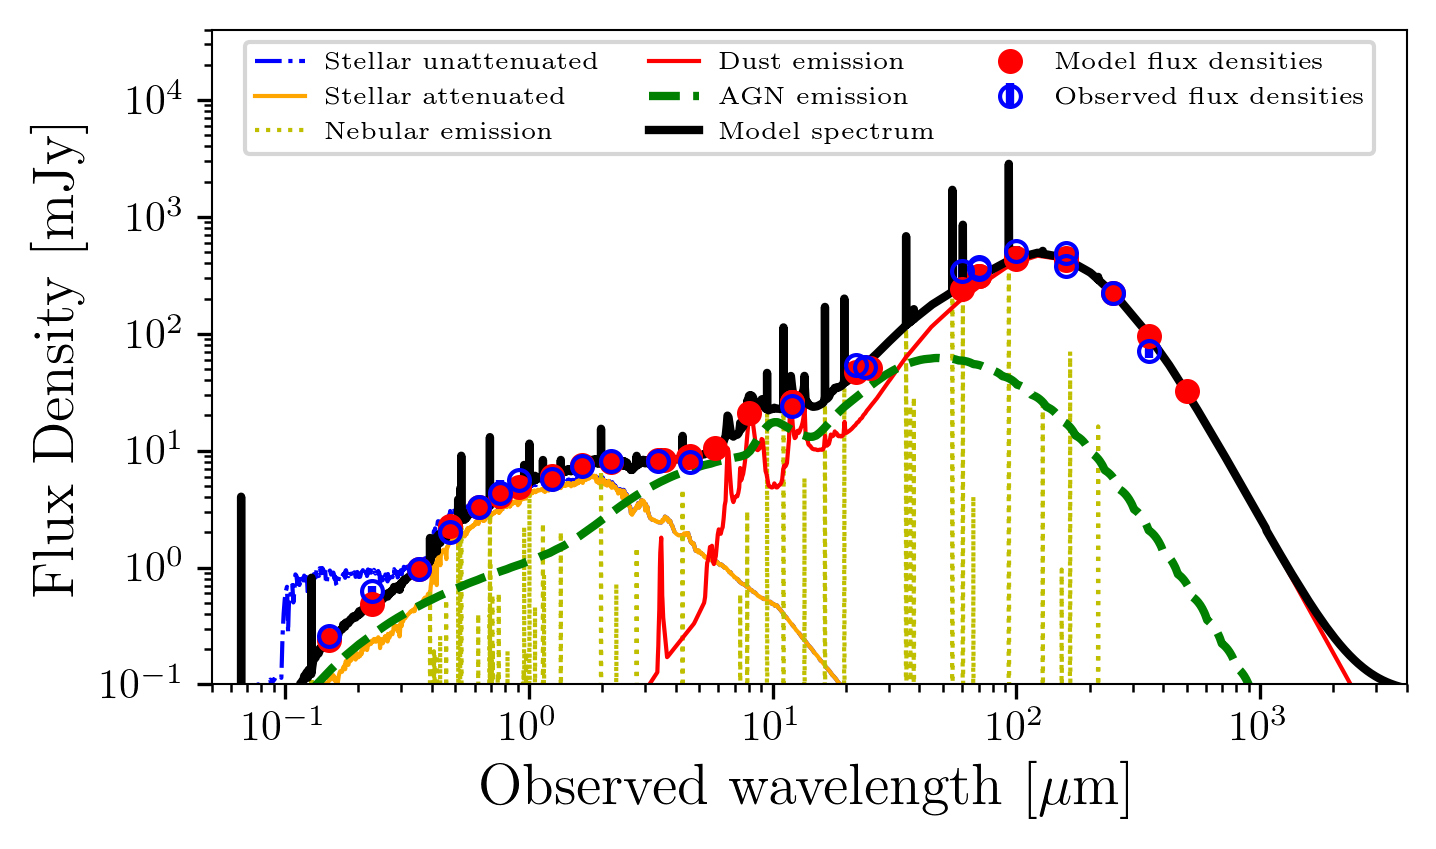

In [7]:
GALAX = 'Mrk  662'
loc_gal = np.where(phot['id'] == GALAX)[0]

fig, axs = plt.subplots()

fig.set_dpi(DPI)
fig.set_size_inches(WINCHES, HINCHES, forward=True)

file_sed = Table.read(
    GITHUB_LINK+"Data/Complementary/ExampleSEDs/Mrk%20%20662_best_model_SKAGN_1.fits")
modr = Table.read(
    GITHUB_LINK+'/Data/Interim/CIGALEOutputs/results_SKAGN_1.fits')
file_sed['agn'] = (file_sed['agn.SKIRTOR2016_dust'] +
                   file_sed['agn.SKIRTOR2016_disk'])
file_sed['freq'] = file_sed['wavelength'].to(u.Hz,
                                             equivalencies=u.spectral())
file_sed['stellar'] = file_sed['stellar.old'] + file_sed['stellar.young']
file_sed['stellar_atten'] = (file_sed['stellar.old']+file_sed['stellar.young'] +
                             file_sed['attenuation.stellar.old'] +
                             file_sed['attenuation.stellar.young'] +
                             file_sed['nebular.absorption_old'] +
                             file_sed['nebular.absorption_young'])
file_sed['nebular'] = (file_sed['nebular.lines_old'] +
                       file_sed['nebular.lines_young'] +
                       file_sed['nebular.continuum_old'] +
                       file_sed['nebular.continuum_young'] +
                       file_sed['attenuation.nebular.lines_old'] +
                       file_sed['attenuation.nebular.lines_young'] +
                       file_sed['attenuation.nebular.lines_old'] +
                       file_sed['attenuation.nebular.continuum_young'])
# This is to define the distance
locat = np.where(modr['id'] == GALAX)
cons = (modr['best.universe.luminosity_distance'][locat])**2 * u.m
# Here we create the subplots
axs.plot(file_sed['wavelength'].to(u.um),
         (((file_sed['stellar']*file_sed['wavelength'].to(u.m)).to(u.W)) /
          (cons*4*np.pi)/file_sed['freq']).to(u.mJy),
         'b', linewidth=1, linestyle='-.',
         label='Stellar unattenuated')
axs.plot(file_sed['wavelength'].to(u.um),
         (((file_sed['stellar_atten']*file_sed['wavelength'].to(u.m)).to(u.W)) /
          (cons*4*np.pi)/file_sed['freq']).to(u.mJy),
         'orange', linewidth=1, linestyle='-',
         label='Stellar attenuated')
axs.plot(file_sed['wavelength'].to(u.um),
         (((file_sed['nebular']*file_sed['wavelength'].to(u.m)).to(u.W)) /
          (cons*4*np.pi)/file_sed['freq']).to(u.mJy),
         'y', linewidth=1, linestyle=':',
         label='Nebular emission')
axs.plot(file_sed['wavelength'].to(u.um),
         (((file_sed['dust']*file_sed['wavelength'].to(u.m)).to(u.W)) /
          (cons*4*np.pi)/file_sed['freq']).to(u.mJy),
         'r', linewidth=1, label='Dust emission')
axs.plot(file_sed['wavelength'].to(u.um),
         (((file_sed['agn']*file_sed['wavelength'].to(u.m)).to(u.W)) /
          (cons*4*np.pi)/file_sed['freq']).to(u.mJy),
         'g', linewidth=2, linestyle='--',
         label='AGN emission')
axs.plot(file_sed['wavelength'].to(u.um), file_sed['Fnu'],
         'k', linewidth=2, label='Model spectrum')
filters = [phot.colnames[x] for x in range(2, len(phot.colnames), 2)]
for i_filter, band in enumerate(filters):
    axs.errorbar(wavelengths[band], phot[str(band)][loc_gal],
                 yerr=phot[str(band)+'_err'][loc_gal],
                 color='b', fmt='o', elinewidth=2,
                 markersize=5, markeredgewidth=1,
                 markeredgecolor='b', markerfacecolor="None",
                 label='Observed flux densities' if i_filter == 1 else None)
    axs.plot(wavelengths[band], modr["best."+band][locat].data,
             'ro', markersize=5,
             label='Model flux densities' if i_filter == 1 else None)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlim(0.5e-1, 4e3)
axs.set_ylim(1e-1, 4e4)
axs.set_ylabel(r'Flux Density [mJy]', fontsize=14)
axs.set_xlabel(r'Observed wavelength [$\mu$m]', fontsize=14)
axs.legend(loc='upper center', fontsize=6, ncol=3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../Figures/SED_example.pdf', bbox_inches='tight', facecolor='white')

###### Notebook information

In [8]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.59.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
pandas    : 1.4.0
astropy   : 5.0
json      : 2.0.9
numpy     : 1.22.1
matplotlib: 3.4.3
autopep8  : 1.5.7

Watermark: 2.2.0

